In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy import mean

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

import pickle

In [2]:
# Download dan extract dataset

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qfKeXVzAFvvbgjPYrUOIBBYk0WrQ2bCf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1qfKeXVzAFvvbgjPYrUOIBBYk0WrQ2bCf" -O loan_dataset.xlsx && rm -rf /tmp/cookies.txt

--2023-05-15 13:40:47--  https://docs.google.com/uc?export=download&confirm=&id=1qfKeXVzAFvvbgjPYrUOIBBYk0WrQ2bCf
Resolving docs.google.com (docs.google.com)... 142.250.107.138, 142.250.107.100, 142.250.107.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.107.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/107nl927ie8lh8vmm95g0ao8pb1ev9or/1684158000000/11309364930090306574/*/1qfKeXVzAFvvbgjPYrUOIBBYk0WrQ2bCf?e=download&uuid=de94584d-c6fd-4327-880d-8759c098f3a3 [following]
--2023-05-15 13:40:48--  https://doc-04-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/107nl927ie8lh8vmm95g0ao8pb1ev9or/1684158000000/11309364930090306574/*/1qfKeXVzAFvvbgjPYrUOIBBYk0WrQ2bCf?e=download&uuid=de94584d-c6fd-4327-880d-8759c098f3a3
Resolving doc-04-90-docs.googleusercontent.com (doc-04-90-docs.googleusercontent.com)... 74.125.199.13

In [3]:
# Import dataset and show dataset
df = pd.read_excel("loan_dataset.xlsx")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   float64
 15  TLMaxSum         2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [4]:
# Find missing values
miss_value = df.isnull().sum()
missing_values = miss_value[miss_value>0]
print(missing_values)
df[missing_values.index].head()

InqTimeLast    188
TLCnt            3
TLSum           40
TLMaxSum        40
TLSatCnt         4
TL75UtilCnt     99
TL50UtilCnt     99
TLBalHCPct      41
TLSatPct         4
TLOpenPct        3
TLOpen24Pct      3
dtype: int64


,InqTimeLast,TLCnt,TLSum,TLMaxSum,TLSatCnt,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLOpenPct,TLOpen24Pct
0,0.0,5.0,19410.0,21147.0,16.0,3.0,3.0,0.9179,0.2083,0.2083,0.0000
1,1.0,1.0,16776.0,20971.0,1.0,1.0,1.0,0.8000,0.0000,1.0000,1.0000
2,5.0,19.0,16903.0,47593.0,21.0,4.0,5.0,0.3552,0.6538,0.7308,0.5263
3,1.0,3.0,18339.0,20093.0,1.0,2.0,3.0,0.9127,0.2500,0.7500,1.3333
4,0.0,1.0,2327.0,1860.0,3.0,1.0,1.0,1.2511,0.0000,0.1429,0.0000


In [5]:
# Based on show data. InqTimeLast, TLCnt, TLSum, TLMaxSum, TLSatCnt, TL75UtilCnt, and TL50UtilCnt have integer values. And other variables have float values
# For handling missing value, replace them using mean for float values and mean with absolute number for integer values.
count_integer_column = 7 
for x in missing_values.index :
  if count_integer_column == 0:
    df[x] = df[x].fillna(df[x].mean())
  else :
    df[x] = df[x].fillna(round(df[x].mean()))
    count_integer_column -= 1

In [6]:
# Check missing values again
df.isnull().sum()

TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [7]:
# Check distribution of TARGET
df["TARGET"].value_counts()

0    2500
1     500
Name: TARGET, dtype: int64

In [8]:
# the data have unbalanced sample, need resampling with combination of oversampling and undersampling
# find combination
X = df.iloc[:,1:]
y = df.iloc[:,0]
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))

SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.568
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.566
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.556
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.557
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.578
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.536
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.567
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.560
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.545


In [9]:
# Take oversampling rate : 0.4 and undersampling rate : 0.6 with max ROC AUC : 0.578
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
print(y.value_counts())
X, y = over.fit_resample(X, y)
print(y.value_counts())
X, y = under.fit_resample(X, y)
print(y.value_counts())

0    2500
1     500
Name: TARGET, dtype: int64
0    2500
1    1000
Name: TARGET, dtype: int64
0    1666
1    1000
Name: TARGET, dtype: int64


In [10]:
# Split data to train and test with ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.2, random_state=1)

In [11]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
# Building model 
DTC_model = DecisionTreeClassifier(random_state=0)
DTC_model.fit(X_train_std, y_train)
RanFor_model = RandomForestClassifier()
RanFor_model.fit(X_train_std, y_train)
XGB_model = XGBClassifier()
XGB_model.fit(X_train_std, y_train)
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_std, y_train)
SVM_model = SVC()
SVM_model.fit(X_train_std, y_train)

SVC()

In [13]:
# Make prediction
DTC_prediction = DTC_model.predict(X_test_std)
RanFor_prediction = RanFor_model.predict(X_test_std)
XGB_prediction = XGB_model.predict(X_test_std)
KNN_prediction = KNN_model.predict(X_test_std)
SVM_prediction = SVM_model.predict(X_test_std)

# Evaluation Model
DTC_eval = classification_report(DTC_prediction, y_test, output_dict=True)
RanFor_eval = classification_report(RanFor_prediction, y_test, output_dict=True)
XGB_eval = classification_report(XGB_prediction, y_test, output_dict=True)
KNN_eval = classification_report(KNN_prediction, y_test, output_dict=True)
SVM_eval = classification_report(SVM_prediction, y_test, output_dict=True)

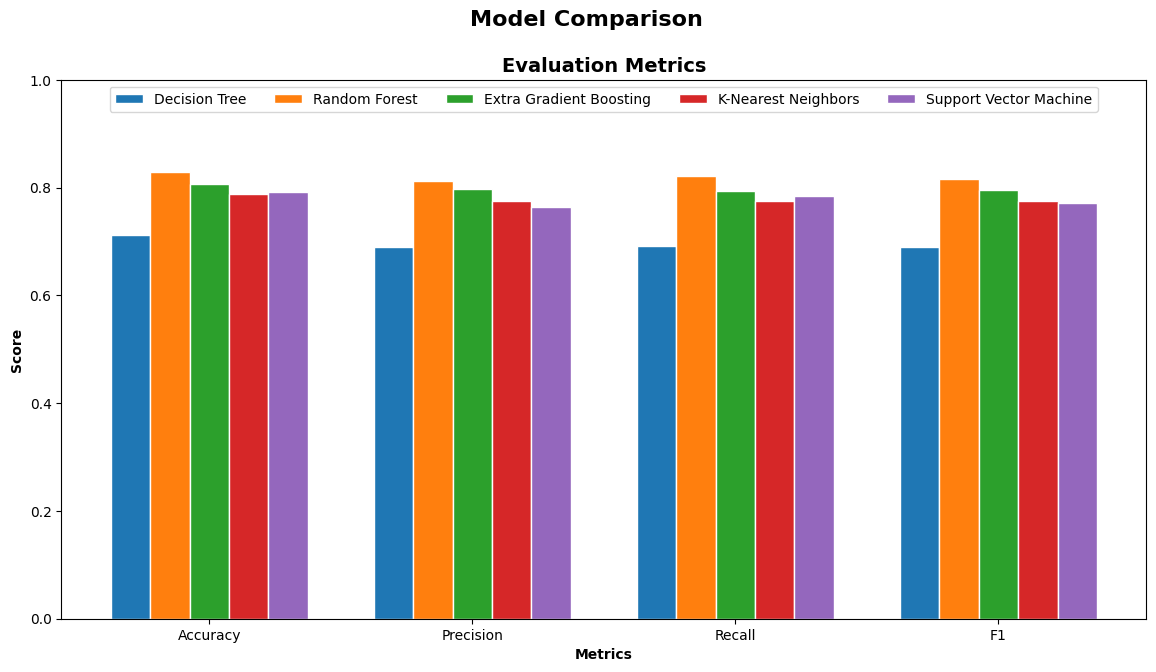

In [14]:
# Intitialize figure
fig, ax1 = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# set bar size
barWidth = 0.15
DTC_score = [DTC_eval['accuracy'], DTC_eval['macro avg']['precision'], DTC_eval['macro avg']['recall'], DTC_eval['macro avg']['f1-score']]
RanFor_score = [RanFor_eval['accuracy'], RanFor_eval['macro avg']['precision'], RanFor_eval['macro avg']['recall'], RanFor_eval['macro avg']['f1-score']]
XGB_score = [XGB_eval['accuracy'], XGB_eval['macro avg']['precision'], XGB_eval['macro avg']['recall'], XGB_eval['macro avg']['f1-score']]
KNN_score = [KNN_eval['accuracy'], KNN_eval['macro avg']['precision'], KNN_eval['macro avg']['recall'], KNN_eval['macro avg']['f1-score']]
SVM_score = [SVM_eval['accuracy'], SVM_eval['macro avg']['precision'], SVM_eval['macro avg']['recall'], SVM_eval['macro avg']['f1-score']]

# Set position of bar on X axis
r1 = np.arange(len(DTC_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Make the plot
ax1.bar(r1, DTC_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, RanFor_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, XGB_score, width=barWidth, edgecolor='white', label='Extra Gradient Boosting')
ax1.bar(r4, KNN_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, SVM_score, width=barWidth, edgecolor='white', label='Support Vector Machine')

# Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 2) for r in range(len(DTC_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

# Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend(loc='upper center',ncol=5)

plt.show()

In [15]:
# Extra Gradient Boosting Classifier is right choice to solve this problem because this model have high metric

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': np.arange(40,100,step=20),
    'max_features': np.arange(2,10),
    'min_samples_leaf': np.arange(2,10),
    'min_samples_split': np.arange(6,13,step=2),
    'n_estimators': np.arange(100,1000,step=100)
}

# Create a base model
# xgb_grids = XGBClassifier(random_state=0)
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = RandomizedSearchCV(rf_grids, param_distributions=param_grid, scoring='recall',cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_std, y_train)

grid_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 700,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 9,
 'max_depth': 60}

In [16]:
grid_search_prediction = grid_search.predict(X_test_std)
grid_search_eval = classification_report(grid_search_prediction, y_test, output_dict=True)

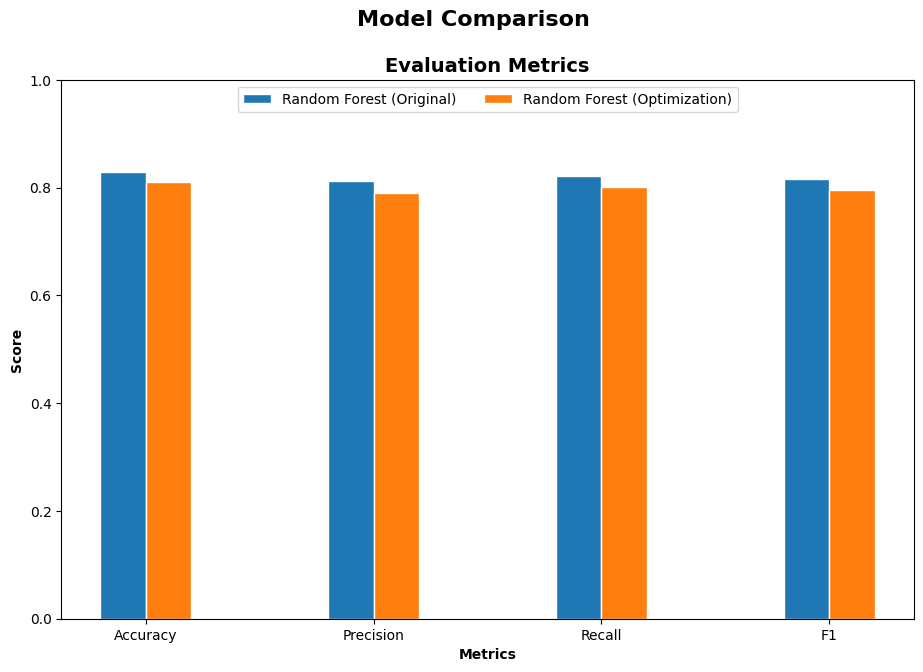

In [18]:
# Intitialize figure with two plots
fig, ax = plt.subplots()
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(11)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
RanFor_score = [RanFor_eval['accuracy'], RanFor_eval['macro avg']['precision'], RanFor_eval['macro avg']['recall'], RanFor_eval['macro avg']['f1-score']]
grid_search_score = [grid_search_eval['accuracy'], grid_search_eval['macro avg']['precision'], grid_search_eval['macro avg']['recall'], grid_search_eval['macro avg']['f1-score']]

## Set position of bar on X axis
r1 = np.arange(len(RanFor_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax.bar(r1, RanFor_score, width=barWidth, edgecolor='white', label='Random Forest (Original)')
ax.bar(r2, grid_search_score, width=barWidth, edgecolor='white', label='Random Forest (Optimization)')

## Configure x and y axis
ax.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax.set_xticks([r + (barWidth * 0.5) for r in range(len(RanFor_score))], )
ax.set_xticklabels(labels)
ax.set_ylabel('Score', fontweight='bold')
ax.set_ylim(0, 1)

## Create legend & title
ax.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax.legend(loc='upper center',ncol=2)

plt.show()

In [20]:
# We can see Extra Gradient Boosting (Original) is good model than Optimization
result = RanFor_model.score(X_test_std, y_test)
print(result)

0.8295880149812734
